In [310]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import cv2
import pandas as pd

from ipywidgets import interactive, widgets
from ipywidgets import FloatSlider as fs

from PIL import Image

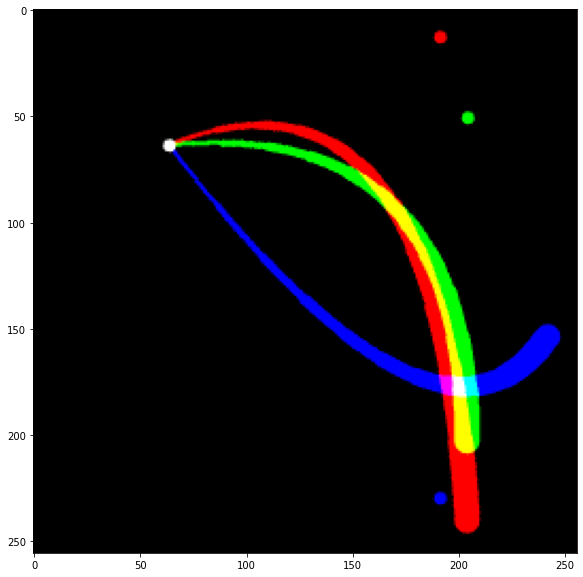

In [335]:
def normal(x, width):
    return (int)(x * (width - 1) + 0.5)

def draw(p0, p1, p2, radius, color, width=256):
    x0, y0, x1, y1, x2, y2, z0, z2, w0, w2 = (*p0, *p1, *p2, *radius, *color)
    x0 = normal(x0, width * 2)
    x1 = normal(x1, width * 2)
    x2 = normal(x2, width * 2)
    y0 = normal(y0, width * 2)
    y1 = normal(y1, width * 2)
    y2 = normal(y2, width * 2)
    z0 = (int)(1 + z0 * width // 2)
    z2 = (int)(1 + z2 * width // 2)
    canvas = np.zeros([width * 2, width * 2]).astype('float32')
    tmp = 1. / 300
    cv2.circle(canvas, (x0, y0), 6, 255, -1)
    cv2.circle(canvas, (x1, y1), 6, 255, -1)
    cv2.circle(canvas, (x2, y2), 6, 255, -1)
    for i in range(300):
        t = i * tmp
        x = (int)((1-t) * (1-t) * x0 + 2 * t * (1-t) * x1 + t * t * x2)
        y = (int)((1-t) * (1-t) * y0 + 2 * t * (1-t) * y1 + t * t * y2)
        z = (int)((1-t) * z0 + t * z2)
        w = (1-t) * w0 + t * w2
        cv2.circle(canvas, (x, y), z, w, -1)
    return cv2.resize(canvas, dsize=(width, width))

red = draw((0.25,0.25),  (0.75,0.05),  (0.8,0.95),  (0.01,0.1),  (255,255))
green = draw((0.25,0.25),  (0.8,0.2),  (0.8,0.8),  (0.01,0.1),  (255,255))
blue = draw((0.25,0.25),  (0.75,0.9),  (0.95,0.6),  (0.01,0.1),  (255,255))

img = np.stack([red, green, blue], axis=2).astype(dtype=np.uint8)

plt.figure(figsize=(10,10))
plt.imshow(img)

In [336]:
def draw_f(x0,y0,x1,y1,x2,y2,r0,r1):
    img = draw((x0,y0), (x1,y1), (x2,y2),  (r0,r1),  (255,255))
    plt.figure(figsize=(10,10))
#     return Image.fromarray(np.uint8(img), 'L')
    plt.imshow(img, cmap='gray')
    plt.show()
    

    
interactive_plot = interactive(draw_f, 
                               x0=(0,1.0),y0=(0,1.0),
                               x1=(0,1.0),y1=(0,1.0),
                               x2=(0,1.0),y2=(0, 1.0),
                               r0=fs(min=0.01, max=1, value=0.01), r1=fs(min=0.01, max=1, value=0.01))
# interactive_plot.children[-1].layout.height = '550px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=0.5, description='y…